In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


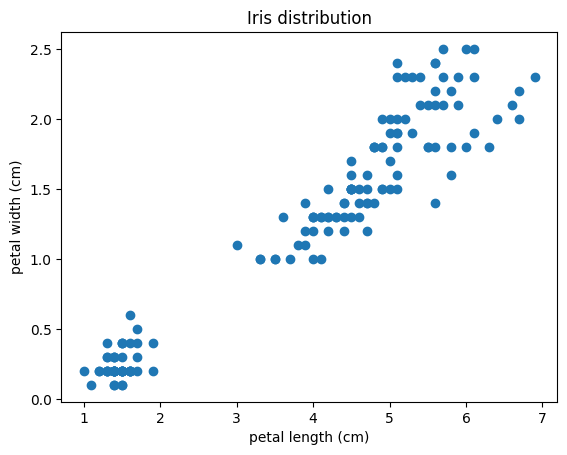

In [ ]:
x = df[['petal length (cm)','petal width (cm)']]

plt.scatter(x['petal length (cm)'], x['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris distribution')
plt.show()

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pd.DataFrame(x_scaled, columns=['petal length (cm)','petal width (cm)'])

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444
...,...,...
145,0.819596,1.448832
146,0.705921,0.922303
147,0.819596,1.053935
148,0.933271,1.448832


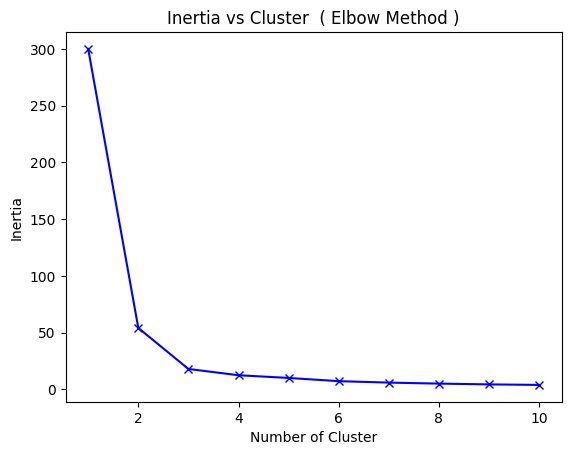

In [ ]:
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Inertia vs Cluster  ( Elbow Method )')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(x_scaled)

df['Clusters'] = clusters
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [ ]:
x_scaled[:,0]

array([-1.34022653, -1.34022653, -1.39706395, -1.2833891 , -1.34022653,
       -1.16971425, -1.34022653, -1.2833891 , -1.34022653, -1.2833891 ,
       -1.2833891 , -1.22655167, -1.34022653, -1.51073881, -1.45390138,
       -1.2833891 , -1.39706395, -1.34022653, -1.16971425, -1.2833891 ,
       -1.16971425, -1.2833891 , -1.56757623, -1.16971425, -1.05603939,
       -1.22655167, -1.22655167, -1.2833891 , -1.34022653, -1.22655167,
       -1.22655167, -1.2833891 , -1.2833891 , -1.34022653, -1.2833891 ,
       -1.45390138, -1.39706395, -1.34022653, -1.39706395, -1.2833891 ,
       -1.39706395, -1.39706395, -1.39706395, -1.22655167, -1.05603939,
       -1.34022653, -1.22655167, -1.34022653, -1.2833891 , -1.34022653,
        0.53540856,  0.42173371,  0.64908342,  0.13754657,  0.47857113,
        0.42173371,  0.53540856, -0.26031542,  0.47857113,  0.08070915,
       -0.14664056,  0.25122143,  0.13754657,  0.53540856, -0.08980313,
        0.36489628,  0.42173371,  0.194384  ,  0.42173371,  0.08

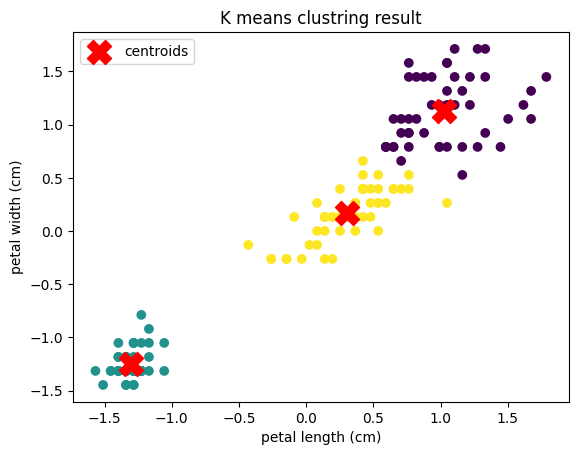

In [ ]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red',marker='X', label='centroids')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('K means clustring result')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
silhouette_avg = silhouette_score(x_scaled, clusters)

print(f'Inertia : {inertia}')
print(f'Silhouette Score : {silhouette_avg}')

Inertia : 18.026962612544075
Silhouette Score : 0.6741313114151009
